In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("datos_finales_no_outliers.csv")

In [9]:
df.columns

Index(['Estación', 'Año', 'Mes', 'Dia', 'Hora', 'Dióxido de Azufre',
       'Monóxido de Carbono', 'Monóxido de Nitrógeno', 'Dióxido de Nitrógeno',
       'Partículas<2.5', 'Partículas<10', 'Óxidos de Nitrógeno', 'Ozono',
       'Tolueno', 'Benceno', 'Etilbenceno', 'HidrocarburosTot', 'Metano',
       'HidrocarburosNoMet', 'Temperatura', 'PuntoRocio', 'TempHumeda',
       'HumedadRelativa', 'Precipitacion', 'Presion', 'VelViento', 'DirViento',
       'Intensidad'],
      dtype='object')

C:\Users\Mariopa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


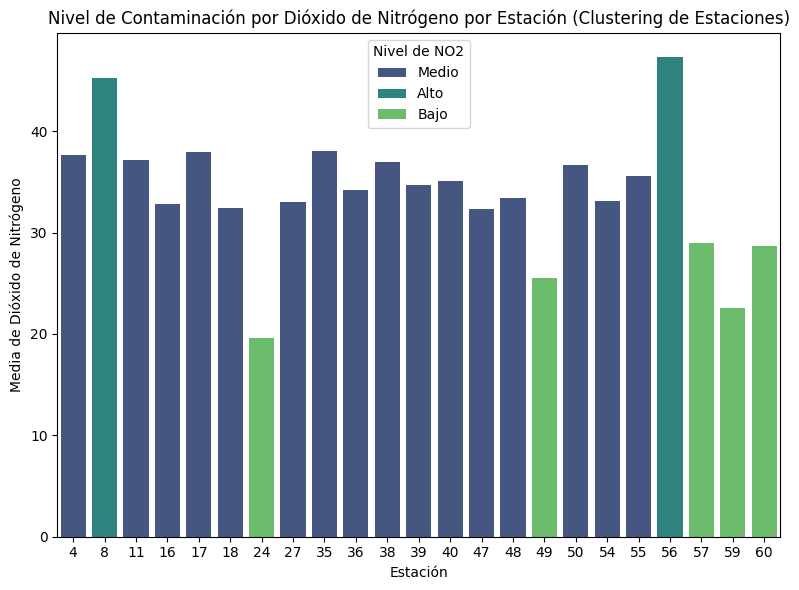

In [101]:
# Calcular la media de Dióxido de Nitrógeno por estación
mean_no2_per_station = df.groupby('Estación')['Dióxido de Nitrógeno'].mean().reset_index()
mean_no2_per_station.columns = ['Estación', 'Media_NO2']

# Preparar los datos para el clustering
no2_values = mean_no2_per_station[['Media_NO2']]

# Escalar los valores medios
scaler = StandardScaler()
scaled_no2_means = scaler.fit_transform(no2_values)

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
mean_no2_per_station['Cluster_NO2'] = kmeans.fit_predict(scaled_no2_means)

# Mapear los clusters a etiquetas descriptivas
def map_contamination_station(cluster):
    if cluster == 0:
        return 'Medio'
    elif cluster == 1:
        return 'Bajo'
    elif cluster == 2:
        return 'Alto'
    return None

mean_no2_per_station['Nivel_NO2_Estación'] = mean_no2_per_station['Cluster_NO2'].apply(map_contamination_station)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.barplot(x='Estación', y='Media_NO2', hue='Nivel_NO2_Estación', data=mean_no2_per_station, palette='viridis')
plt.title('Nivel de Contaminación por Dióxido de Nitrógeno por Estación (Clustering de Estaciones)')
plt.xlabel('Estación')
plt.ylabel('Media de Dióxido de Nitrógeno')
plt.legend(title='Nivel de NO2')
plt.tight_layout()
plt.show()